Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Getting the data

In [ ]:
path = "/gdrive/My Drive/ML:March2020/Assignments/data/"
data = pd.read_csv(path+"titanic_train.csv")
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
data.shape

(891, 12)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


Droping 0.2% of the data that has been missing in the feature embarked 

In [ ]:
data.dropna(subset = ['Embarked'], inplace=True)
data["Embarked"].replace({"S": "0","C":"1","Q":"2"}, inplace=True)
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Replacing NAN values in the feature age with the mean value with respect to title

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

Cross tab initial

In [ ]:
pd.crosstab(data.Initial,data.Sex).style.background_gradient(cmap='jet')

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Replacing special titles to regular titles

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Finding mean for each title

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.751678
Mr        32.739609
Mrs       35.743119
Other     45.888889
Name: Age, dtype: float64

Replacing null value with mean value of the appropriate title

In [ ]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46

data.Age.isnull().any()

False

Dividing age feature into six classes

In [ ]:
data['Age'] = data['Age'].astype(int)
data.loc[data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[data['Age'] > 66, 'Age'] = 6

In [ ]:
data["Fare"].min()

0.0

In [ ]:
data["Fare"].median()

14.4542

In [ ]:
data["Fare"].max()

512.3292

In [ ]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 99), 'Fare']   = 3
data.loc[(data['Fare'] > 99) & (data['Fare'] <= 250), 'Fare']   = 4
data.loc[ data['Fare'] > 250, 'Fare'] = 5
data['Fare'] = data['Fare'].astype(int)

data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
881,882,0,3,"Markun, Mr. Johann",male,4,0,0,349257,0,NaN,0,Mr
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,2,0,0,7552,1,NaN,0,Miss
883,884,0,2,"Banfield, Mr. Frederick James",male,4,0,0,C.A./SOTON 34068,1,NaN,0,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,3,0,0,SOTON/OQ 392076,0,NaN,0,Mr
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,5,0,5,382652,2,NaN,2,Mrs
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,1,NaN,0,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,2,0,0,112053,2,B42,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,2,NaN,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,2,C148,1,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,4,0,0,370376,0,NaN,2,Mr


Creating a family by adding siblings/spouse and parents/children

In [ ]:
data['Family']=data['SibSp']+data['Parch']
data[['Family','SibSp','Parch']].head(10)

,Family,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
5,0,0,0
6,0,0,0
7,4,3,1
8,2,0,2
9,1,1,0


survival rate in each feature

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='jet')

**Inference** :
Looking at CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low.

In [ ]:
pd.crosstab([data.Age,data.Survived],data.Sex,margins=True).style.background_gradient(cmap='jet')

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='jet')

Survived,0,1
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
pd.crosstab([data.Family,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='jet')

In [ ]:
pd.crosstab([data.Survived], [data.Sex,data.Pclass, data.Embarked], margins=True).style.background_gradient(cmap='jet')

Graphs

Sex vs count

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


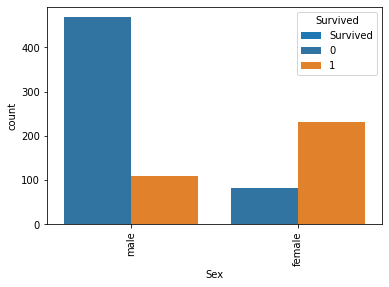

In [ ]:
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=data,)
plt.show()

**Inference** : It is clearly seen thatwome are given high priority while Rescue.There are greater no. of men when to compared to women but the survival rate is lesser for men.

Pclass vs count

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


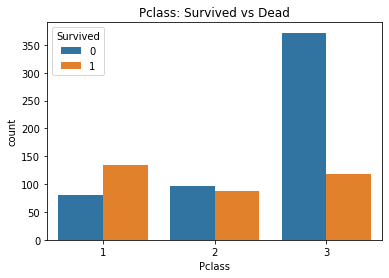

In [ ]:
sns.countplot('Pclass', hue='Survived', data=data)
plt.title('Pclass: Survived vs Dead')
plt.show()

**Inference** : It is clearly seen that pasangers of Class 1 are given high priority while Rescue.There are greater no. of passengers in class 3 than class 1 and class 2,but the survival rate of class 3 is the lowest followed by class 2 and class 1.

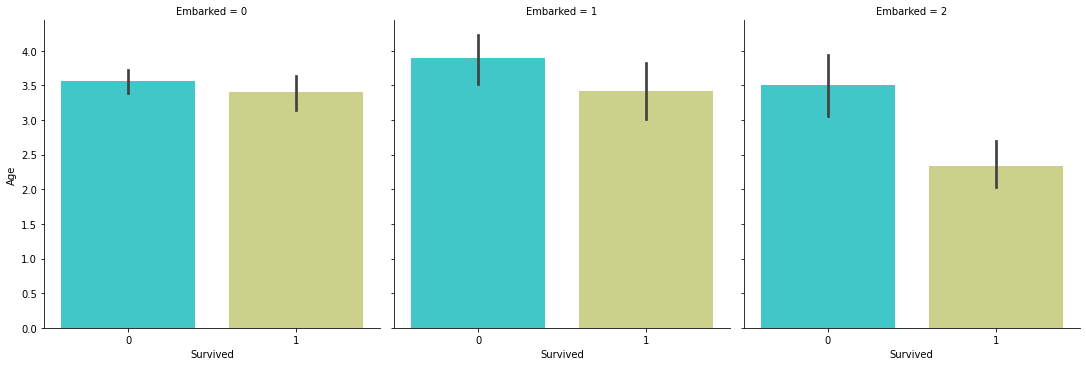

In [ ]:
sns.catplot(x="Survived", y="Age",col="Embarked", kind = 'bar',data=data, palette = "rainbow") 

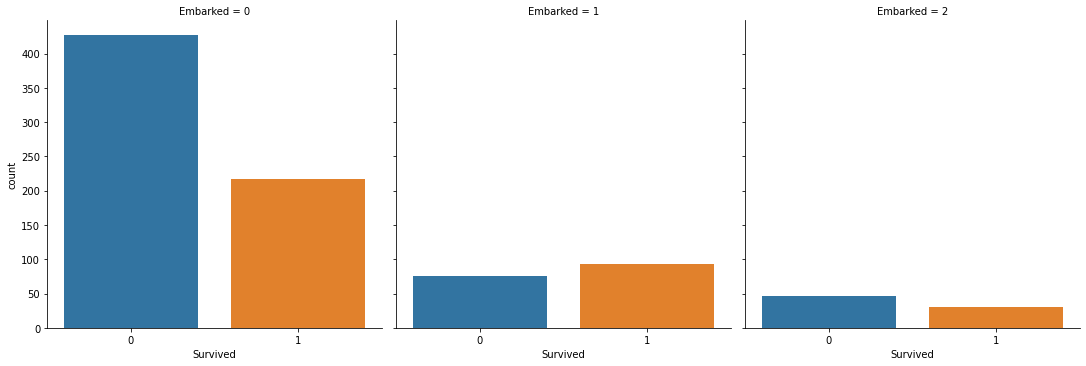

In [ ]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


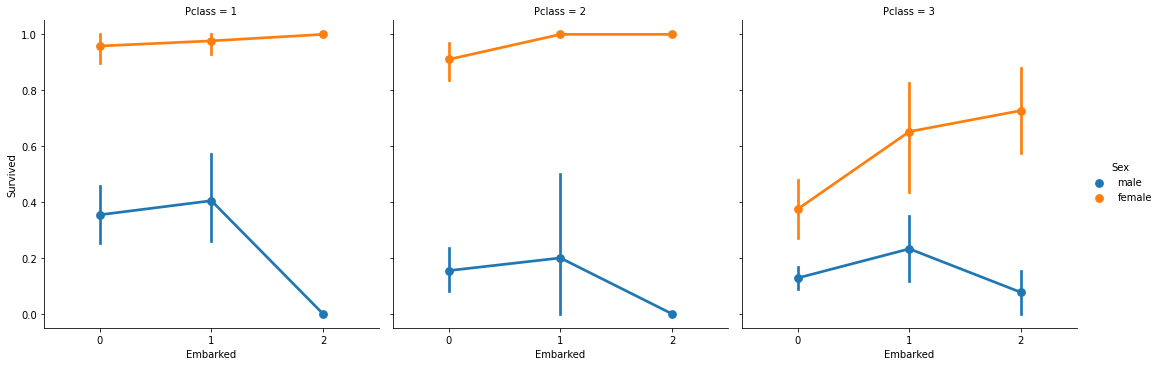

In [ ]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=data);

Inference : Women of Pclass 2 that embarked in C and Q had a higher survival rate,also nearly all women of Pclass 1 had the best survival rate.All men of Pclass 1 and 2 embarked in Q had lowest survival rate,survival rate for men in Pclass 2 and 3 is always below 0.2.For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


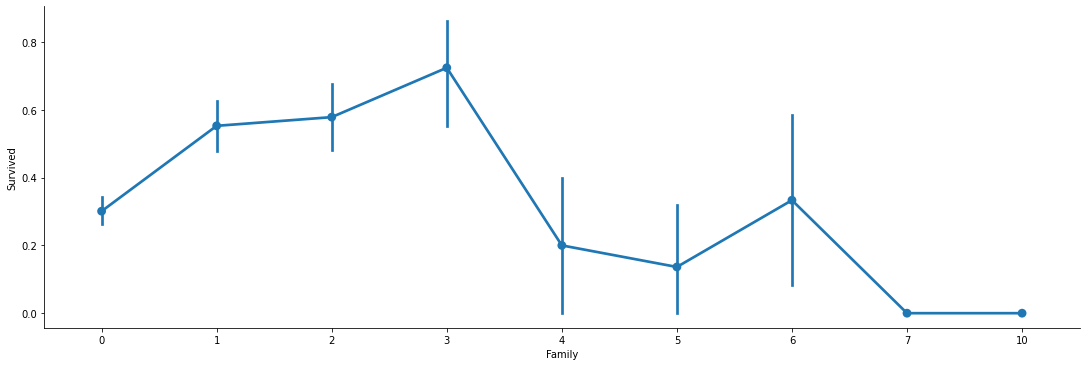

In [ ]:
sns.factorplot('Family','Survived',data=data, aspect = 3)

Here we can see that passengers with 1 - 3 family members had high probability for survival and also we can see that passengers with more than 6 family members have very low probablity for survival.

Label encoding and removing features

In [ ]:
data["Sex"].replace({"male": "0","female":"1"}, inplace=True)
data["Initial"].replace({"Mr": "0","Mrs":"1","Master":"2","Miss":"3","Other":"4"}, inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,C85,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,1,NaN,0,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,C123,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,NaN,0,0,0
5,6,0,3,"Moran, Mr. James",0,4,0,0,330877,1,NaN,2,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,17463,3,E46,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,NaN,0,2,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,347742,1,NaN,0,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,237736,2,NaN,1,1,1


In [ ]:
data=data.drop('Cabin', axis=1)
data=data.drop('Ticket', axis=1)
data=data.drop('Name', axis=1)
data=data.drop('PassengerId', axis=1)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family
0,0,3,0,2,1,0,0,0,0,1
1,1,1,1,5,1,0,3,1,1,1
2,1,3,1,3,0,0,1,0,3,0
3,1,1,1,5,1,0,3,0,1,1
4,0,3,0,5,0,0,1,0,0,0
5,0,3,0,4,0,0,1,2,0,0
6,0,1,0,6,0,0,3,0,0,0
7,0,3,0,0,3,1,2,0,2,4
8,1,3,1,3,0,2,1,0,1,2
9,1,2,1,1,1,0,2,1,1,1


**Models**

Logistic regression

In [ ]:
y=data['Survived']
x=data.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family
0,3,0,2,1,0,0,0,0,1
1,1,1,5,1,0,3,1,1,1
2,3,1,3,0,0,1,0,3,0
3,1,1,5,1,0,3,0,1,1
4,3,0,5,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,4,0
887,1,1,2,0,0,2,0,3,0
888,3,1,2,1,2,2,0,3,3
889,1,0,3,0,0,2,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2) #splitting the data in train:test::75:25 ratio
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((666, 9), (223, 9), (666,), (223,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_0=model.predict(x_test)

In [ ]:
print('Logistic Regression Training Accuracy:', model.score(x_train, y_train))
print('Logistic Regression Test Accuracy:', model.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_0))
print("************************************************************************")
print(y_pred_0)

Logistic Regression Training Accuracy: 0.7912912912912913
Logistic Regression Test Accuracy: 0.8116591928251121
************************************************************************
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       143
           1       0.75      0.71      0.73        80

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0

Knn

KNN using ball tree algorithm

In [ ]:
Y_train = y_train.ravel()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Kn_classifier_ball = KNeighborsClassifier(algorithm = 'ball_tree',n_neighbors=4)
Kn_classifier_ball.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred_1 = Kn_classifier_ball.predict(x_test)

In [ ]:
print('knn Training Accuracy:', Kn_classifier_ball.score(x_train, y_train))
print('knn Test Accuracy:', Kn_classifier_ball.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_1))
print("************************************************************************")
print(y_pred_1)

knn Training Accuracy: 0.8423423423423423
knn Test Accuracy: 0.8295964125560538
************************************************************************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       143
           1       0.80      0.70      0.75        80

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223

************************************************************************
[0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0

Knn using auto algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Kn_classifier_auto = KNeighborsClassifier(algorithm = 'auto',n_neighbors=5)
Kn_classifier_auto.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_2 = Kn_classifier_auto.predict(x_test)

In [ ]:
print('knn Training Accuracy:', Kn_classifier_auto.score(x_train, y_train))
print('knn Test Accuracy:', Kn_classifier_auto.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_2))
print("************************************************************************")
print(y_pred_2)

knn Training Accuracy: 0.8333333333333334
knn Test Accuracy: 0.8251121076233184
************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       143
           1       0.75      0.76      0.76        80

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

************************************************************************
[0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0

Gaussian naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_G = GaussianNB()
model_G.fit(x_train, y_train)
y_pred_3=model_G.predict(x_test)

In [ ]:
print('Gaussian Training Accuracy:', model_G.score(x_train, y_train))
print('Gaussian Test Accuracy:', model_G.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_3))
print("************************************************************************")
print(y_pred_3)

Gaussian Training Accuracy: 0.7777777777777778
Gaussian Test Accuracy: 0.7668161434977578
************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       143
           1       0.65      0.75      0.70        80

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.78      0.77      0.77       223

************************************************************************
[0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0

Bernaulli's naive bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_B = BernoulliNB()
model_B.fit(x_train, y_train)
y_pred_4=model_B.predict(x_test)

In [ ]:
print('Bernaulli Training Accuracy:', model_B.score(x_train, y_train))
print('Bernaulli Test Accuracy:', model_B.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_4))
print("************************************************************************")
print(y_pred_4)

Bernaulli Training Accuracy: 0.7807807807807807
Bernaulli Test Accuracy: 0.8161434977578476
************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       143
           1       0.72      0.80      0.76        80

    accuracy                           0.82       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.82      0.82      0.82       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=20)
dtree_classifier.fit(x_train, y_train)
y_pred_5 = dtree_classifier.predict(x_test)

In [ ]:
print('Decision tree Training Accuracy:', dtree_classifier.score(x_train, y_train))
print('Decision tree Test Accuracy:', dtree_classifier.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_5))
print("************************************************************************")
print(y_pred_5)

Decision tree Training Accuracy: 0.8588588588588588
Decision tree Test Accuracy: 0.852017937219731
************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       143
           1       0.79      0.80      0.80        80

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 

In [ ]:
Label="Survived"
features=x.columns
features 

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial',
       'Family'],
      dtype='object')

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import  graphviz as gr

export_graphviz(dtree_classifier,out_file="dtree.dot",feature_names=features,class_names=Label,rounded=True,precision=4,filled=True)
graph=gr.graph_from_dot_file("dtree.dot")
graph.write_png("tree.png")

True

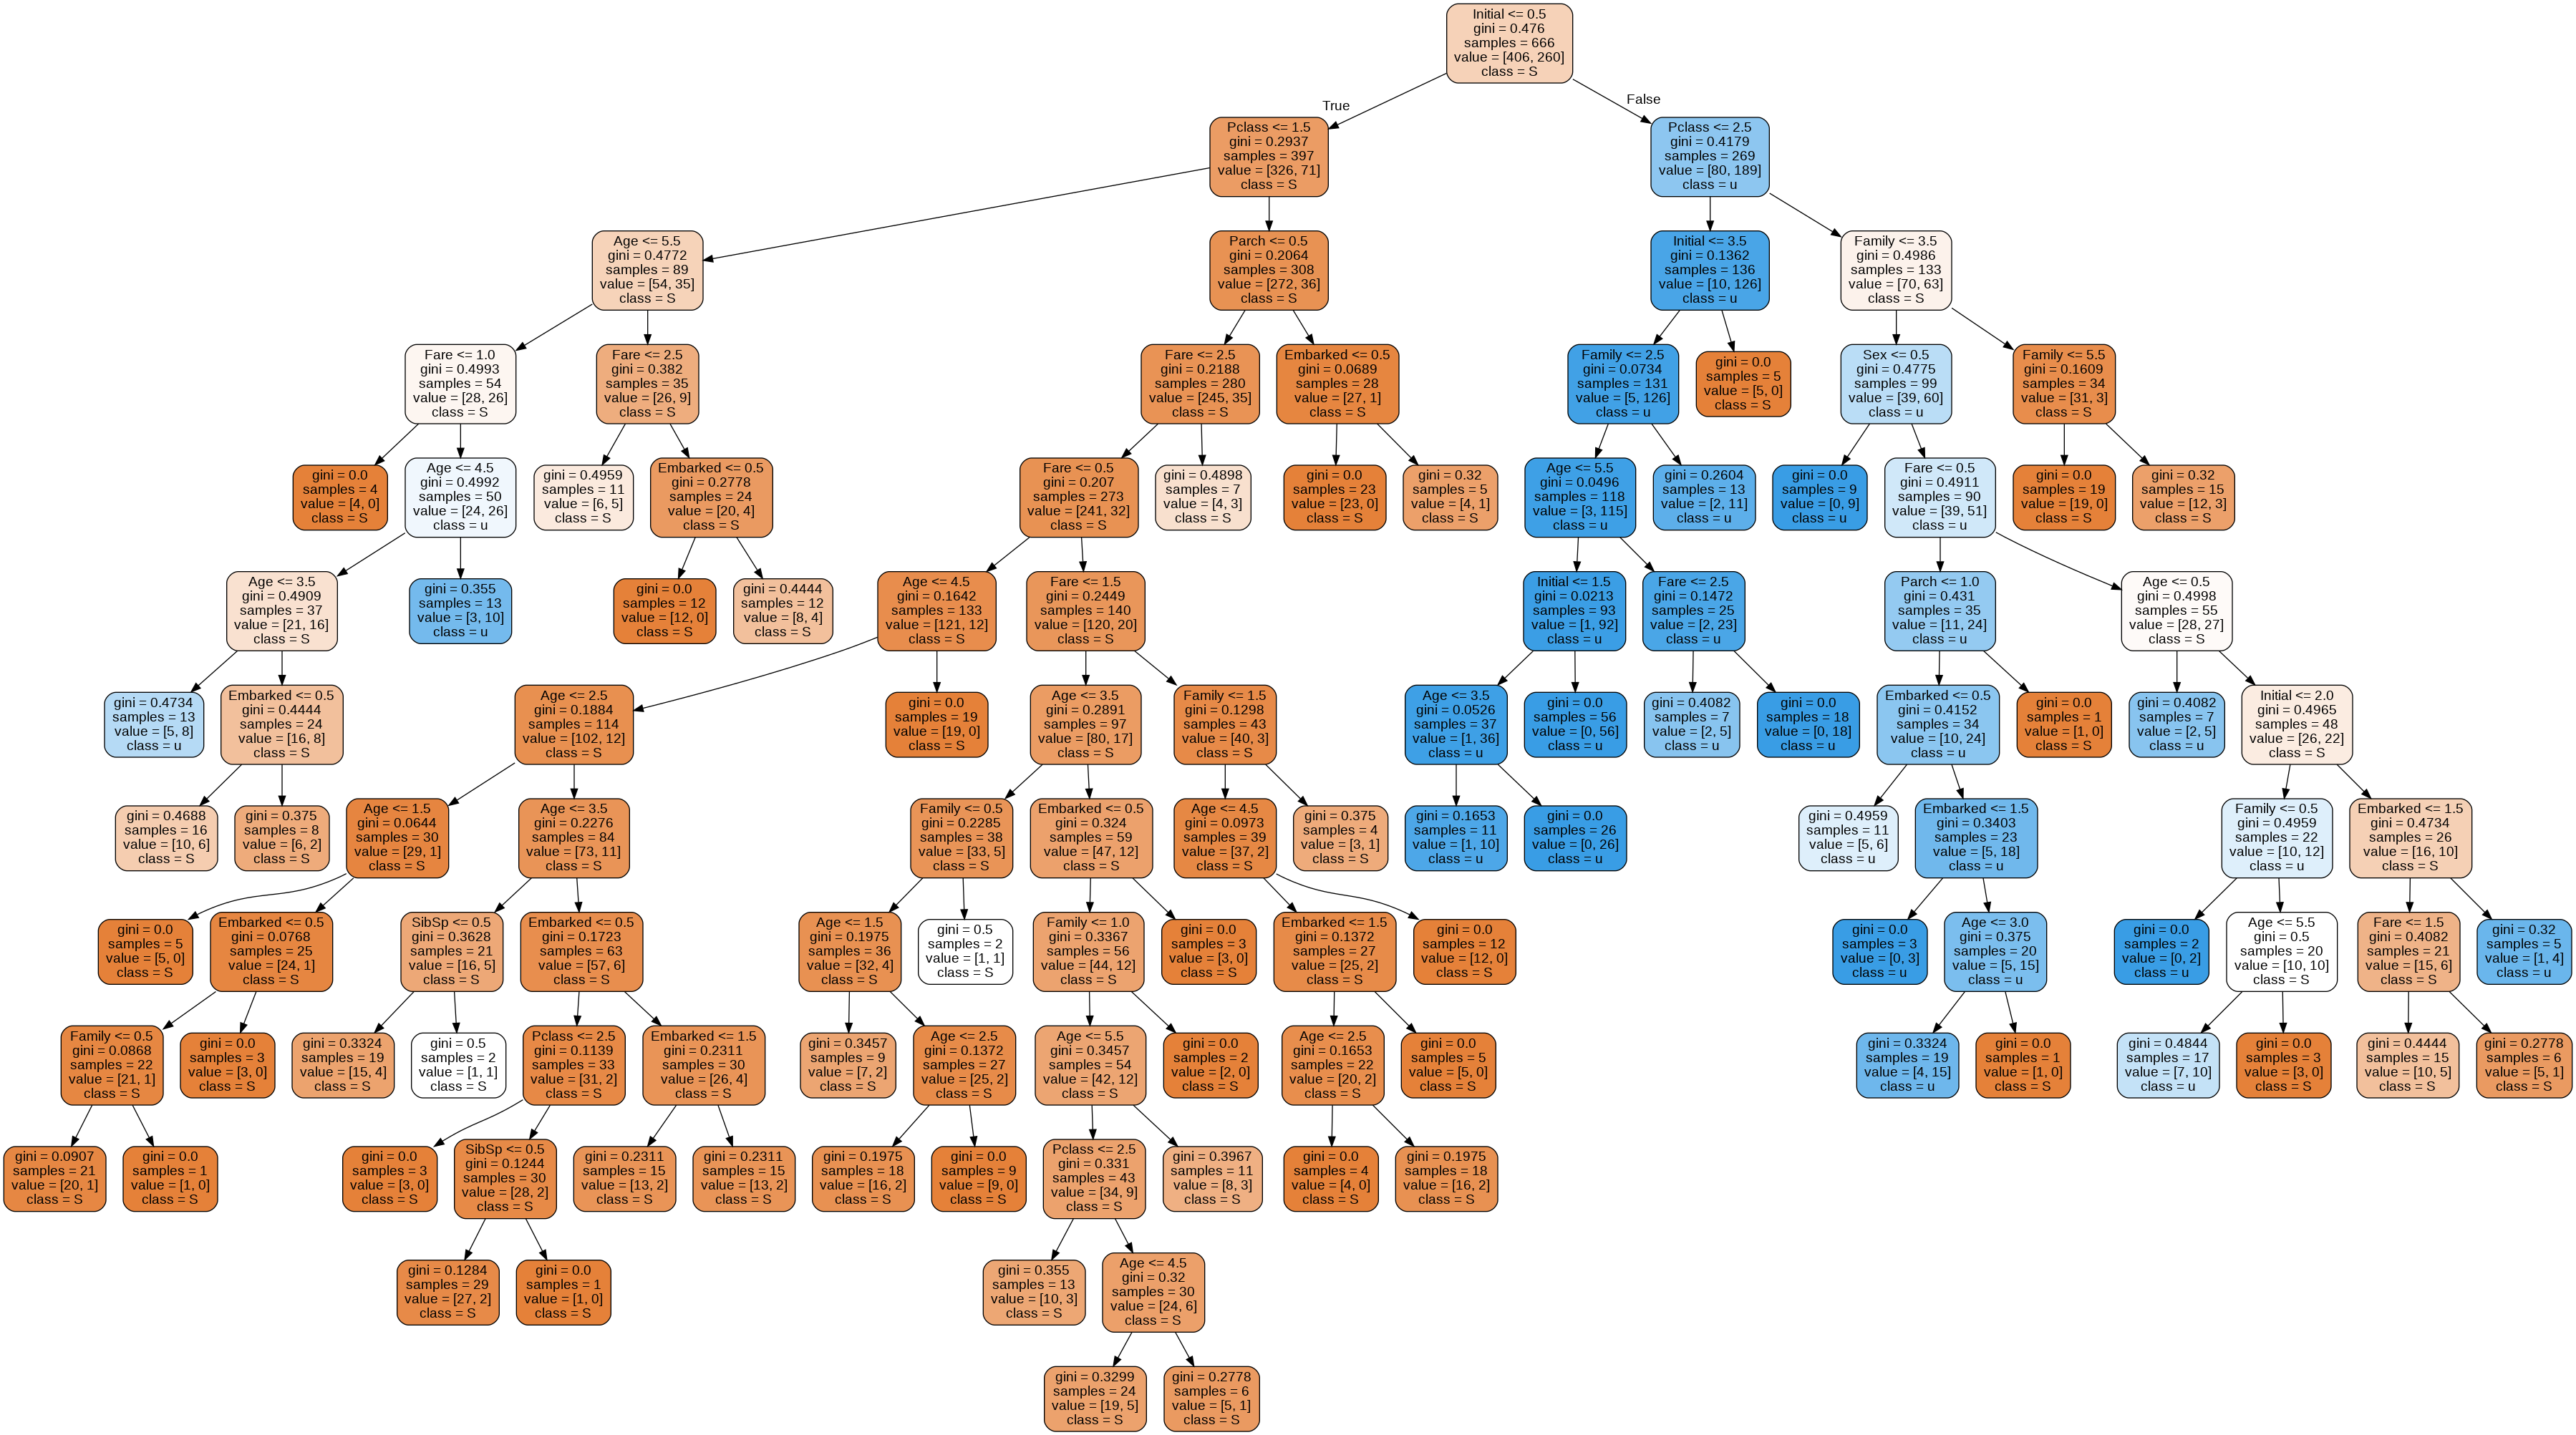

In [ ]:
from PIL import Image
from IPython.display import display

im=Image.open("tree.png")
display(im)

Decision tree with entropy criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_classifier_1 = DecisionTreeClassifier(criterion='entropy',min_samples_split=25)
dtree_classifier_1.fit(x_train, y_train)
y_pred_6 = dtree_classifier_1.predict(x_test)

In [ ]:
print('Decision tree Training Accuracy:', dtree_classifier_1.score(x_train, y_train))
print('Decision tree Test Accuracy:', dtree_classifier_1.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_6))
print("************************************************************************")
print(y_pred_6)

Decision tree Training Accuracy: 0.8528528528528528
Decision tree Test Accuracy: 0.852017937219731
************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       143
           1       0.79      0.80      0.80        80

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 

In [ ]:
export_graphviz(dtree_classifier_1,out_file="dtree_1.dot",feature_names=features,class_names=Label,rounded=True,precision=4,filled=True)
graph=gr.graph_from_dot_file("dtree_1.dot")
graph.write_png("tree_1.png")

True

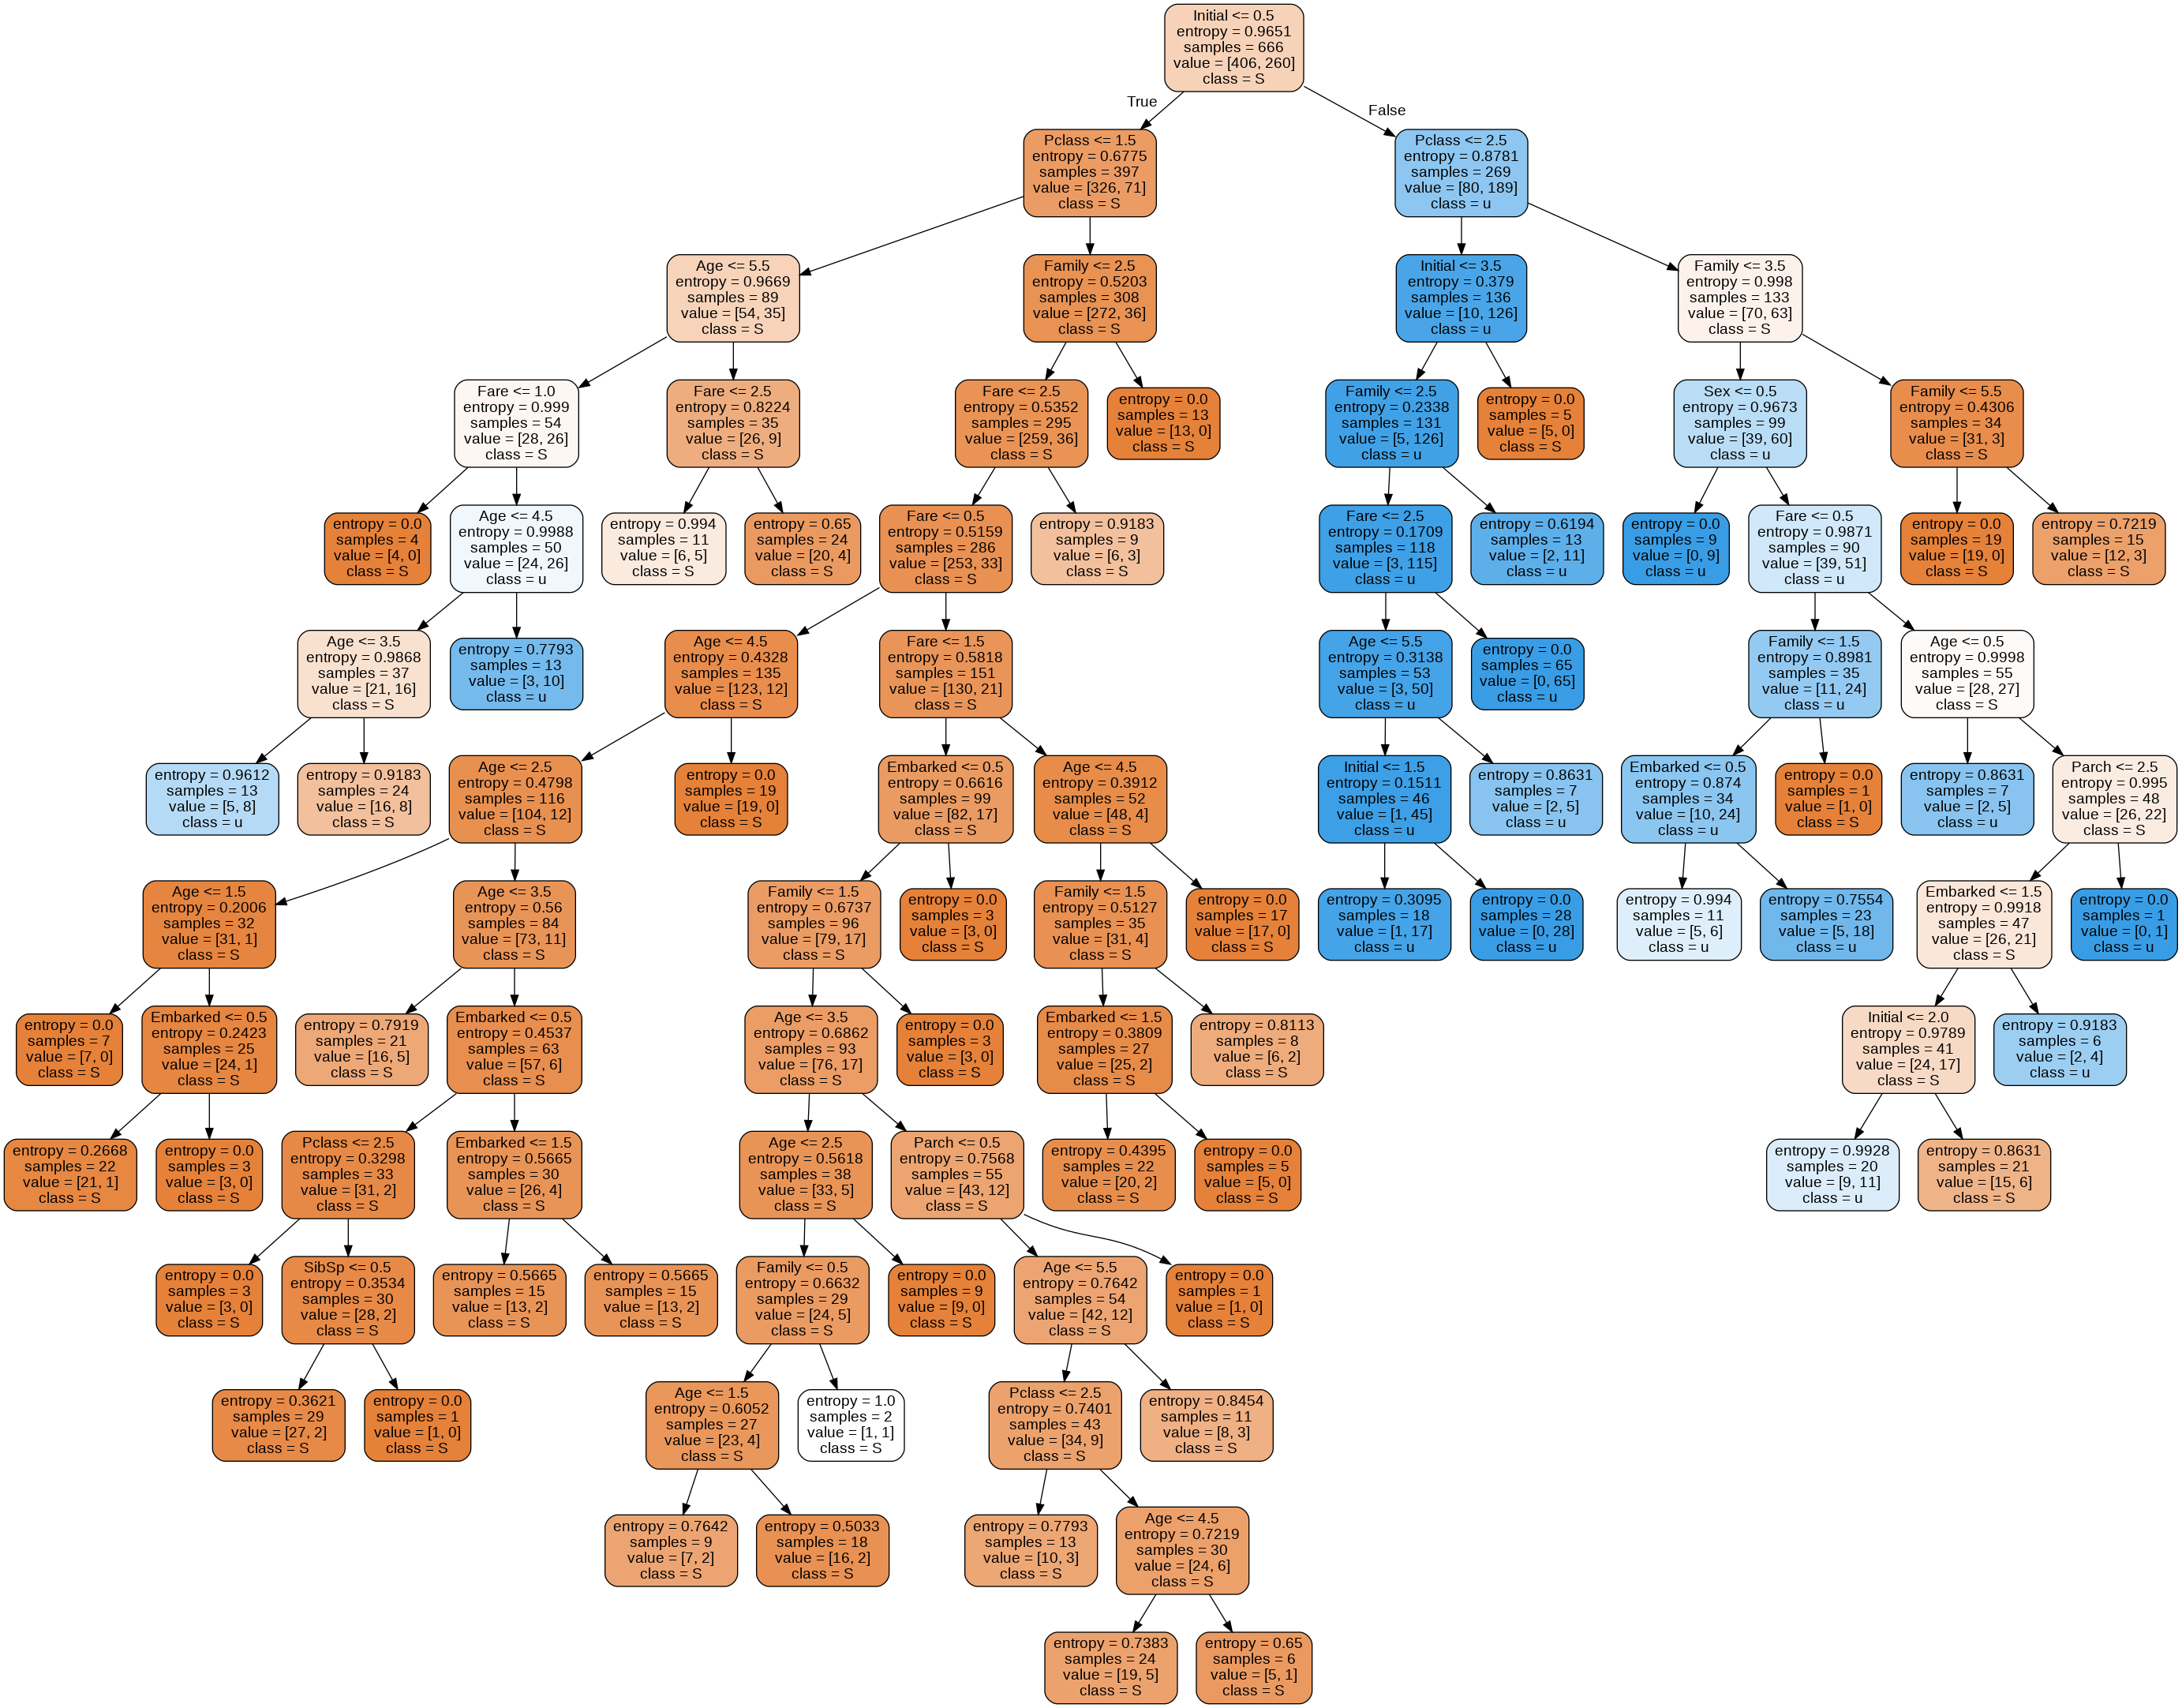

In [ ]:
im_1=Image.open("tree_1.png")
display(im_1)

Trying out various classification models from sklearn that we haven't used before

Quadratic discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Quadratic_model = QuadraticDiscriminantAnalysis()
Quadratic_model .fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
y_pred_7 = Quadratic_model.predict(x_test)
print('quadratic model Training Accuracy:', Quadratic_model .score(x_train, y_train))
print('quadratic model Test Accuracy:', Quadratic_model .score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_7))
print("************************************************************************")
print(y_pred_7)

quadratic model Training Accuracy: 0.7852852852852853
quadratic model Test Accuracy: 0.7533632286995515
************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       143
           1       0.63      0.78      0.69        80

    accuracy                           0.75       223
   macro avg       0.74      0.76      0.74       223
weighted avg       0.77      0.75      0.76       223

************************************************************************
[0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RForest_classifier= RandomForestClassifier(criterion="gini",min_samples_split=25)
RForest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_8 = RForest_classifier.predict(x_test)
print('Random forest Training Accuracy:', RForest_classifier.score(x_train, y_train))
print('Random forest Test Accuracy:', RForest_classifier.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_8))
print("************************************************************************")
print(y_pred_8)

Random forest Training Accuracy: 0.8468468468468469
Random forest Test Accuracy: 0.874439461883408
************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       143
           1       0.87      0.76      0.81        80

    accuracy                           0.87       223
   macro avg       0.87      0.85      0.86       223
weighted avg       0.87      0.87      0.87       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 

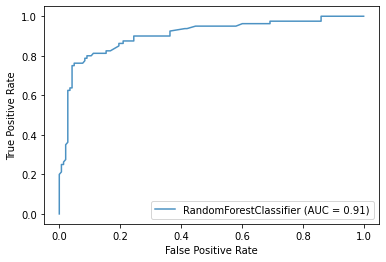

In [ ]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp_0 = plot_roc_curve(RForest_classifier, x_test, y_test, ax=ax, alpha=0.8)

plt.show(rfc_disp_0)

Random forest with entropy criterion

In [ ]:
RForest_classifier_1= RandomForestClassifier(criterion="entropy",min_samples_split=25)
RForest_classifier_1.fit(x_train, y_train)
y_pred_9 = RForest_classifier_1.predict(x_test)
print('Random forest Training Accuracy:', RForest_classifier_1.score(x_train, y_train))
print('Random forest Test Accuracy:', RForest_classifier_1.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_9))
print("************************************************************************")
print(y_pred_9)

Random forest Training Accuracy: 0.8588588588588588
Random forest Test Accuracy: 0.874439461883408
************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       143
           1       0.86      0.78      0.82        80

    accuracy                           0.87       223
   macro avg       0.87      0.85      0.86       223
weighted avg       0.87      0.87      0.87       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 

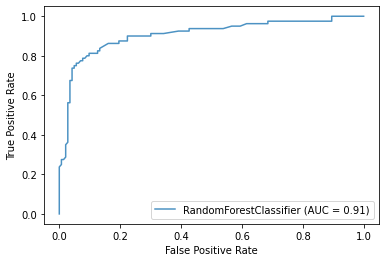

In [ ]:
ax = plt.gca()
rfc_disp_1 = plot_roc_curve(RForest_classifier_1, x_test, y_test, ax=ax, alpha=0.8)
plt.show(rfc_disp_1)

Extra Trees classification

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
ETree_classifier= ExtraTreesClassifier(criterion="gini",min_samples_split=25)
ETree_classifier.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=25,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
y_pred_10 = ETree_classifier.predict(x_test)
print('Extra tree Training Accuracy:', ETree_classifier.score(x_train, y_train))
print('Extra tree  Test Accuracy:', ETree_classifier.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_10))
print("************************************************************************")
print(y_pred_10)

Extra tree Training Accuracy: 0.8558558558558559
Extra tree  Test Accuracy: 0.8654708520179372
************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       143
           1       0.86      0.75      0.80        80

    accuracy                           0.87       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.87      0.86       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 

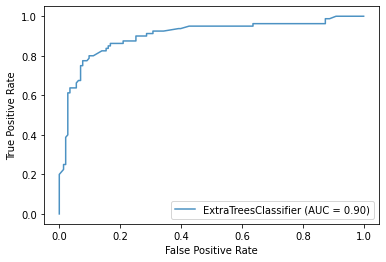

In [ ]:
ax = plt.gca()
rfc_disp_2 = plot_roc_curve(ETree_classifier, x_test, y_test, ax=ax, alpha=0.8)
plt.show(rfc_disp_2)

Extra tree classifier with entropy criterion

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
ETree_classifier_1= ExtraTreesClassifier(criterion="entropy",min_samples_split=30)
ETree_classifier_1.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=30,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
y_pred_11 = ETree_classifier_1.predict(x_test)
print('Extra tree Training Accuracy:', ETree_classifier_1.score(x_train, y_train))
print('Extra tree  Test Accuracy:', ETree_classifier_1.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_11))
print("************************************************************************")
print(y_pred_11)

Extra tree Training Accuracy: 0.8588588588588588
Extra tree  Test Accuracy: 0.8565022421524664
************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       143
           1       0.85      0.72      0.78        80

    accuracy                           0.86       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.86      0.85       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 

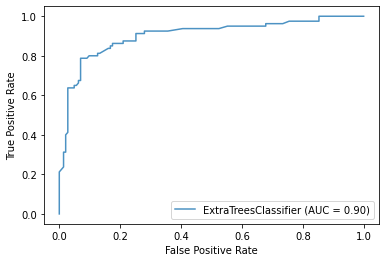

In [ ]:
ax = plt.gca()
rfc_disp_3 = plot_roc_curve(ETree_classifier_1, x_test, y_test, ax=ax, alpha=0.8)
plt.show(rfc_disp_3)

Ridge classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
Rclassifier= RidgeClassifier(solver="auto")
Rclassifier.fit(x_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
y_pred_12 = Rclassifier.predict(x_test)
print('Ridge classifier Training Accuracy:', Rclassifier.score(x_train, y_train))
print('Ridge classifier Test Accuracy:', Rclassifier.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_12))
print("************************************************************************")
print(y_pred_12)

Ridge classifier Training Accuracy: 0.7957957957957958
Ridge classifier Test Accuracy: 0.8161434977578476
************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       143
           1       0.75      0.72      0.74        80

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0

Ridge classifier with inbuilt cross validation

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
RclassifierCV= RidgeClassifierCV(store_cv_values="True")
RclassifierCV.fit(x_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values='True')

In [ ]:
y_pred_13 = RclassifierCV.predict(x_test)
print('Ridge classifier with CV Training Accuracy:', RclassifierCV.score(x_train, y_train))
print('Ridge classifier with CV Test Accuracy:', RclassifierCV.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_13))
print("************************************************************************")
print(y_pred_13)

Ridge classifier with CV Training Accuracy: 0.7957957957957958
Ridge classifier with CV Test Accuracy: 0.8161434977578476
************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       143
           1       0.75      0.72      0.74        80

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0

stochastic gradient descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

SGDclass = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3,loss="log",learning_rate="adaptive",eta0=1))
SGDclass.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=1,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='adaptive', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_pred_14 = SGDclass.predict(x_test)
print('SGD Training Accuracy:', SGDclass.score(x_train, y_train))
print('SGD Test Accuracy:', SGDclass.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_14))
print("************************************************************************")
print(y_pred_14)

SGD Training Accuracy: 0.7882882882882883
SGD Test Accuracy: 0.820627802690583
************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       143
           1       0.76      0.74      0.75        80

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223

************************************************************************
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 

Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
Perceptron = Perceptron(tol=1e-3, random_state=0,n_jobs=5)
Perceptron.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=5,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_15 = Perceptron.predict(x_test)
print('Perceptron Training Accuracy:', Perceptron.score(x_train, y_train))
print('Perceptron Test Accuracy:',Perceptron.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_15))
print("************************************************************************")
print(y_pred_15)

Perceptron Training Accuracy: 0.7327327327327328
Perceptron Test Accuracy: 0.726457399103139
************************************************************************
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       143
           1       0.76      0.35      0.48        80

    accuracy                           0.73       223
   macro avg       0.74      0.64      0.65       223
weighted avg       0.73      0.73      0.69       223

************************************************************************
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
Pclassifier= PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3,loss="squared_hinge")
Pclassifier.fit(x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='squared_hinge', max_iter=1000,
                            n_iter_no_change=5, n_jobs=None, random_state=0,
                            shuffle=True, tol=0.001, validation_fraction=0.1,
                            verbose=0, warm_start=False)

In [ ]:
y_pred_16 = Pclassifier.predict(x_test)
print('Passive Aggressive Classifier Training Accuracy:',Pclassifier.score(x_train, y_train))
print('Passive Aggressive Classifier Test Accuracy:',Pclassifier.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_16))
print("************************************************************************")
print(y_pred_16)

Passive Aggressive Classifier Training Accuracy: 0.6186186186186187
Passive Aggressive Classifier Test Accuracy: 0.6457399103139013
************************************************************************
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       143
           1       1.00      0.01      0.02        80

    accuracy                           0.65       223
   macro avg       0.82      0.51      0.40       223
weighted avg       0.77      0.65      0.51       223

************************************************************************
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(RForest_classifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.272
Initial,0.258
Pclass,0.180
Fare,0.073
Age,0.071
Family,0.062
SibSp,0.032
Embarked,0.030
Parch,0.022


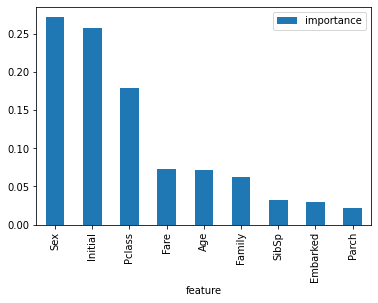

In [ ]:
importances.plot.bar()

**From all the models the random forest algorithm gave the best accuracy with the criteria gini as well as the criteria entropy and minimum sample split of 25 for the test data with 87% accuracy .**